In [1]:
!pip install kneed

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import wbgapi as wb
import errors, cluster_tools
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler

In [3]:
cdcntr = ['IND','VNM','GBR']    # country codes
ind=["NY.GDP.PCAP.PP.CD","EN.ATM.CO2E.KT"]   # World bank indicators
mng=["GDP Per Capita","CO2 Emission"]    # indicator names

wbdtgdp = wb.data.DataFrame("NY.GDP.PCAP.PP.CD", cdcntr, mrv=60).T    # read data and transpose to get the dataframe by country GDP PER CAPITA
wbdtgdp=wbdtgdp.fillna(wbdtgdp.mean())    # cleaning missing values by mean
wbdtgdp.head()

economy,GBR,IND,VNM
YR1990,17091.305116,1204.242059,1184.121960
YR1991,17420.421211,1231.955439,1269.694401
YR1992,17840.551028,1301.824124,1382.001087
YR1993,18673.348462,1367.697536,1499.160068
YR1994,19755.255084,1460.115434,1636.064414


In [4]:
wbdtco2  = wb.data.DataFrame("EN.ATM.CO2E.KT", cdcntr, mrv=60).T  # read data and transpose to get the dataframe by country CO2 Emission
wbdtco2=wbdtco2.fillna(wbdtco2.mean())    # cleaning missing values by mean
wbdtco2.head()

economy,GBR,IND,VNM
YR1990,561774.2,563577.2,19327.9
YR1991,570681.3,607225.8,19796.6
YR1992,557885.3,626294.3,20812.9
YR1993,541376.1,651351.7,24244.9
YR1994,535182.9,685903.4,26682.4


In [5]:
def linechart(df, nm, ccd):   # visulize line chart
    plt.figure(figsize=(8,4))    # plot figure size
    plt.title('{} of Selected Countries by Year'.format(nm))   # plot title
    plt.plot(df[ccd[0]],"#F67280",label=ccd[0])    # line chart for the country code IND
    plt.plot(df[ccd[1]],"#FFFF33",label=ccd[1])    # line chart for the country code VNM
    plt.plot(df[ccd[2]],"#00FA9A",label=ccd[2])    # line chart for the country code GBR
    plt.xlabel("Year")    # x-label
    plt.xticks(rotation=90)   # rotating x-ticks (label)
    plt.ylabel("{}".format(nm))   # y-label
    plt.legend()    # set legen default to beft position
    plt.show()

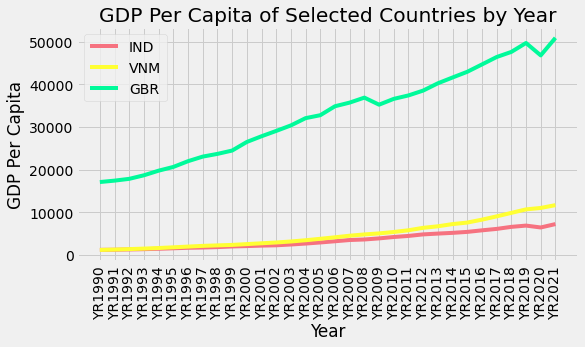

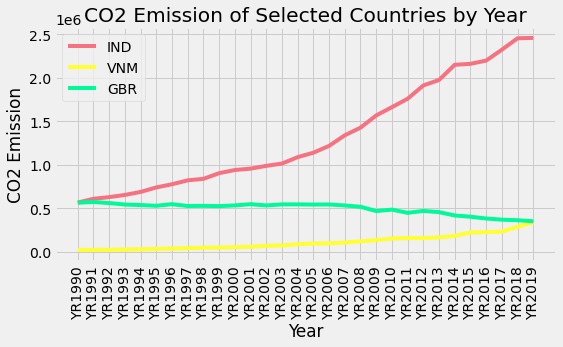

In [6]:
dts=[wbdtgdp,wbdtco2]
for d in range(len(dts)):
    linechart(dts[d], mng[d], cdcntr)

<Figure size 432x432 with 0 Axes>

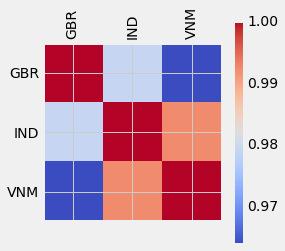

<Figure size 432x432 with 0 Axes>

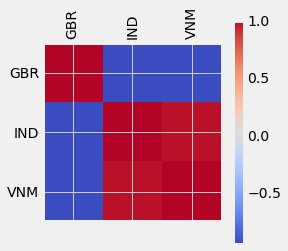

In [7]:
for d in range(len(dts)):
    cluster_tools.map_corr(dts[d])   # Call map_error function to plot correlation

In [8]:
scldfs=[]
mns=[]
mxs=[]
for d in range(len(dts)):
    res=cluster_tools.scaler(dts[d])   # call scalar method to normalize data
    scldfs.append(res[0])   # store normaliozed data
    mns.append(res[1])   # store the minimum value
    mxs.append(res[2])   # store the maximum value
print(scldfs[0].head(),"\n")
print(scldfs[1].head())

economy       GBR       IND       VNM
YR1990   0.000000  0.000000  0.000000
YR1991   0.009746  0.004590  0.008156
YR1992   0.022187  0.016162  0.018860
YR1993   0.046849  0.027072  0.030027
YR1994   0.078887  0.042379  0.043075 

economy       GBR       IND       VNM
YR1990   0.959834  0.000000  0.000000
YR1991   1.000000  0.023061  0.001478
YR1992   0.942298  0.033136  0.004682
YR1993   0.867851  0.046375  0.015503
YR1994   0.839924  0.064630  0.023188


In [9]:
bckarr=[]
for s in range(len(scldfs)):
    bckarr.append(cluster_tools.backscale(np.array(scldfs[s]),mns[s],mxs[s]))    # backscaling
print(bckarr[0],"\n")
print(bckarr[1])

[[17091.30511557  1204.24205851  1184.12196043]
 [17420.4212114   1231.95543892  1269.69440117]
 [17840.55102778  1301.82412428  1382.0010871 ]
 [18673.34846213  1367.69753566  1499.16006806]
 [19755.25508373  1460.11543354  1636.06441367]
 [20629.14605797  1572.02144661  1798.52487006]
 [21974.99997119  1688.38640733  1970.78873529]
 [23049.54766886  1753.08592524  2136.5002369 ]
 [23684.04049334  1847.25669629  2253.39535167]
 [24463.49632883  2001.63410706  2363.7322713 ]
 [26477.30420546  2087.22477607  2552.68256648]
 [27812.49414856  2197.10940357  2743.48041039]
 [29062.12386678  2275.44150645  2932.06285596]
 [30356.81021151  2459.95391559  3163.5092423 ]
 [32058.60192219  2680.89808066  3457.79178976]
 [32747.35400984  2936.56044322  3797.0454411 ]
 [34843.34054502  3221.6977778   4146.95161233]
 [35699.82867639  3510.38877423  4519.04462776]
 [36863.58476018  3636.06037101  4819.01114837]
 [35212.81719973  3892.53003087  5059.34195261]
 [36574.7115626   4215.58082753  5391.16

In [10]:
cluster_tools.get_diff_entries(scldfs[0],scldfs[1],'GBR')

total entries 60
entries in common 2


[0.009746050962379316,
 0.02218727353772131,
 0.04684874205752619,
 0.0788870325099199,
 0.10476539603748396,
 0.14461990632283578,
 0.1764402783915794,
 0.19522939105166248,
 0.21831126517424562,
 0.2779457663215365,
 0.3174844865331088,
 0.3544895284388777,
 0.39282882346593634,
 0.44322365055007584,
 0.4636195322216335,
 0.5256875740082788,
 0.5510505905330365,
 0.5855126731972708,
 0.5366288143545359,
 0.576958327356863,
 0.6007841808051786,
 0.6343868737803404,
 0.6848684479170146,
 0.7251968021271927,
 0.7646491318018984,
 0.8156549526292325,
 0.8670949735824302,
 0.9026629561907119,
 0.9644979246243458,
 0.8785461257138697,
 0.9598343970988373,
 0.9422978236773729,
 0.8678513740567477,
 0.8399238093176659,
 0.8021572028062847,
 0.8863475460341252,
 0.7903565756400855,
 0.7985158690003671,
 0.7838693647259144,
 0.8205564228618942,
 0.8853744193030824,
 0.8200951120899493,
 0.8753405718089063,
 0.8755155362072584,
 0.8657802104442923,
 0.870938503621492,
 0.8188171504793033,
 0.75

## Clustering

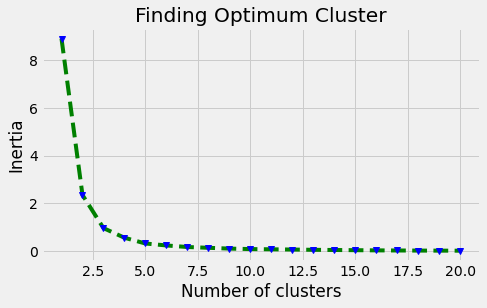

In [11]:
wss = []
for i in range(1, 21):    # checking best k-value by employing cluster values 1-21
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=200,  random_state=10)    # crerate k-means model
    kmeans.fit(scldfs[0])   # fit moidel
    wss.append(kmeans.inertia_)
plt.figure(figsize=(7,4))   # plot figure
plt.title('Finding Optimum Cluster')   # plot title
plt.plot(range(1, 21), wss,"g--")
plt.plot(range(1, 21), wss,"vb")
plt.xlabel('Number of clusters')    # x-label
plt.ylabel('Inertia')   # y-label
plt.show()

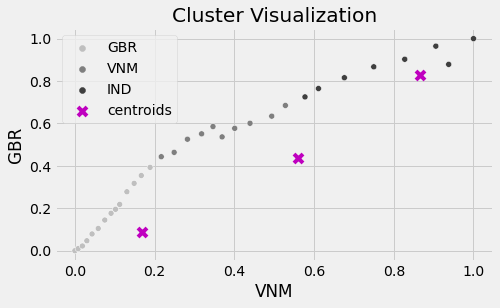

In [12]:
kmeans = KMeans(n_clusters=3, max_iter=100, n_init=50, random_state=0)   # appltying final k-means with the final cluster value
clus_model1 = kmeans.fit(scldfs[0])   # training k-means model with GDP Per Capita data
nlst=[]
for i in clus_model1.labels_:
    if i==0:
        nlst.append(wbdtgdp.columns[0])    # set couny name with code IND
    elif i==1:
        nlst.append(wbdtgdp.columns[1])    # set couny name with code VNM
    elif i==2:
        nlst.append(wbdtgdp.columns[2])    # set couny name with code GBR
df=pd.DataFrame(scldfs[0],columns=wbdtgdp.columns)
plt.figure(figsize=(7,4))
plt.title('Cluster Visualization')    # visulizing clusters
sns.scatterplot(data=df, x=wbdtgdp.columns[2], y=wbdtgdp.columns[0], hue=nlst,palette="gist_yarg")
plt.scatter(clus_model1.cluster_centers_[:,0], clus_model1.cluster_centers_[:,1], 
            marker="x", c="m", s=80, label="centroids")
plt.legend()     # set legen default to best position
plt.show()

## Curve Fitting

In [13]:
def exponent(x, a, b, c):
    return a * np.exp(-b * x) + c

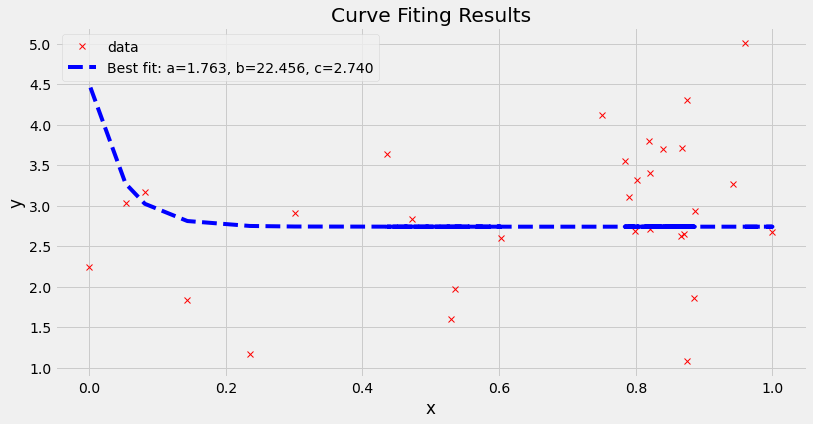

In [14]:
y = exponent(scldfs[1].values[:,1], 2.2, 0.4, 0.9)   # call function for computation
rng = np.random.default_rng()    # Setting range for curve fiting
try:
    y_noise = 0.3 * rng.normal(size=scldfs[1].values[:,1].size)  # determining errors 
    ydata = y + y_noise     # getting prediction
    popt, pcov = curve_fit(exponent, scldfs[1].values[:,1], ydata)     # apply curve fitting
except:
    y_noise = round(np.random.random(),2) * rng.normal(size=scldfs[1].values[:,1].size)  # determining errors 
    ydata = y + y_noise     # getting prediction
    popt, pcov = curve_fit(exponent, scldfs[1].values[:,1], ydata)     # apply curve fitting
plt.figure(figsize=(12,6))
plt.title('Curve Fiting Results')   # plot title
plt.plot(scldfs[1].values[:,0], ydata, 'rx', label='data')
plt.plot(scldfs[1].values[:,0], exponent(scldfs[1].values[:,0], *popt), 'b--',label='Best fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')    # x-label
plt.ylabel('y')   # y-label
plt.legend()     # set legen default to best position
plt.show()